In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/") 
sys.path.insert(0, module_path)

In [2]:
import numpy as np
from scipy.io import loadmat

from conic_tools.analysis.signals import SpikeList, StateMatrix
from conic_tools.analysis.metrics.spikes import compute_isi_stats, compute_spike_stats, compute_synchrony
# ...

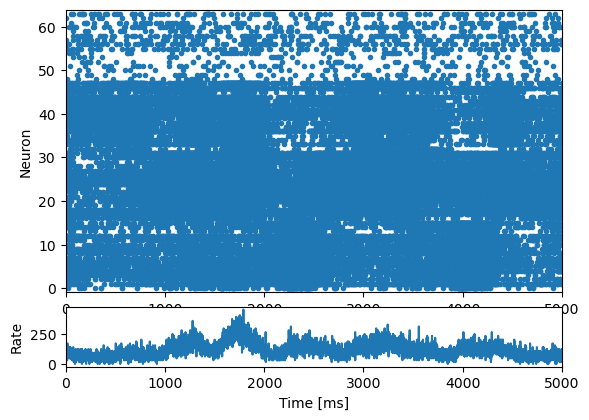

In [3]:
data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n1-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]

spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)

sl_n1 = SpikeList(spk_times, spk_ids)
sl_n1_small = sl_n1.time_slice(0., 5000.)
sl_n1_small.raster_plot(with_rate=True)

In [4]:
states = sl_n1_small.filter_spiketrains(dt=0.1, tau=20.)


Compiling activity matrix from SpikeList


100%|██████████| 64/64 [00:40<00:00,  1.58it/s]


In [6]:
sm_n1_small = StateMatrix(states, label="n1-states", state_var="filtered-spikes", population="n1")

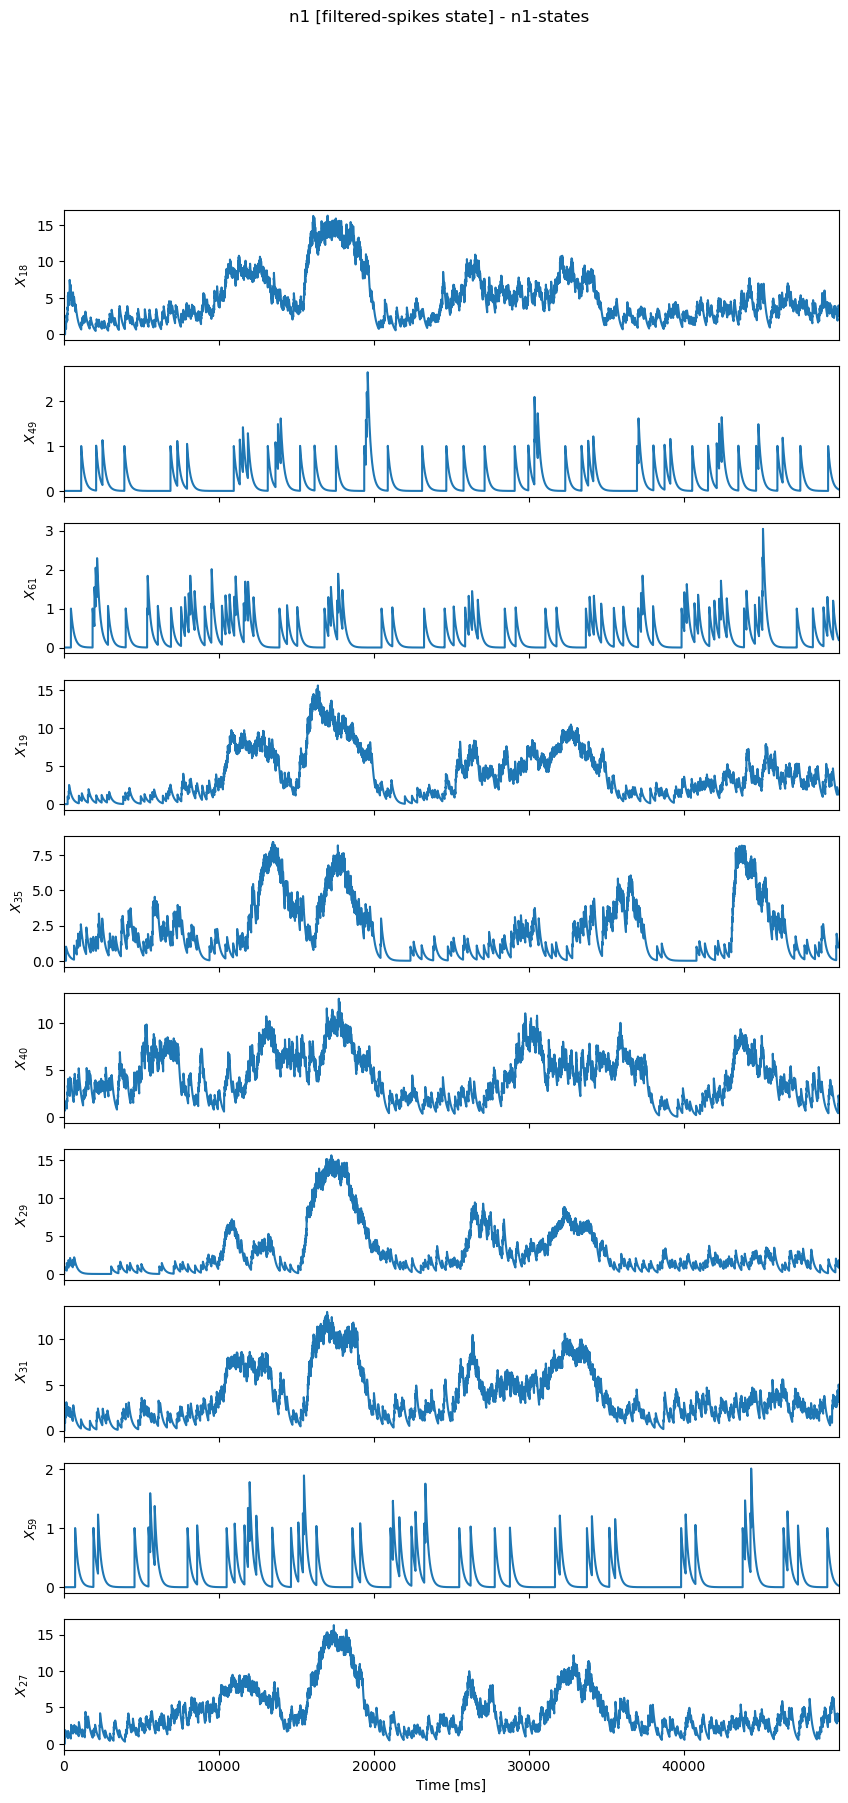

In [14]:
sm_n1_small.plot_sample_traces()

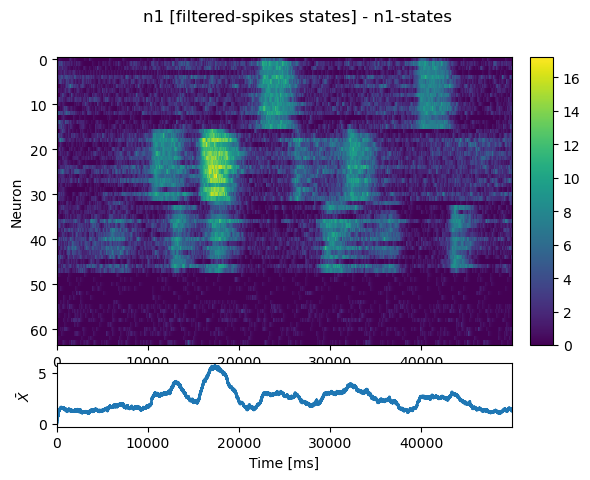

In [8]:
sm_n1_small.plot_matrix()

[states.py:164 - INFO] Determining effective dimensionality of states n1-states
[states.py:177 - INFO] - Effective dimensionality = 3.22
[states.py:178 - INFO] - Elapsed Time: 0.207 s


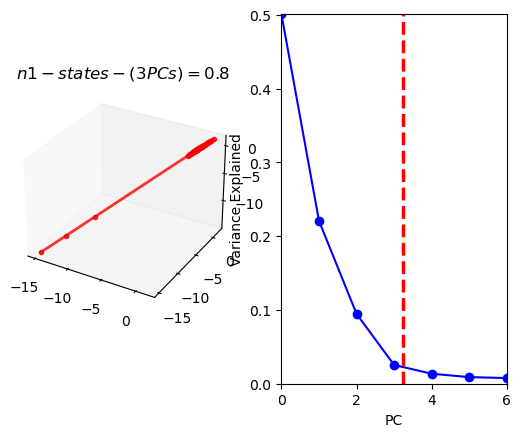

3.2227983788926937

In [9]:
sm_n1_small.effective_dimensionality()

In [10]:
# sm_n1_small.autocorrelation_timescale()

TypeError: StateMatrix.autocorrelation_timescale() missing 1 required positional argument: 'time_axis'

In [12]:
sm_n1_small.rank()

64

In [16]:
# sm_n1_small.reduce_dimensionality

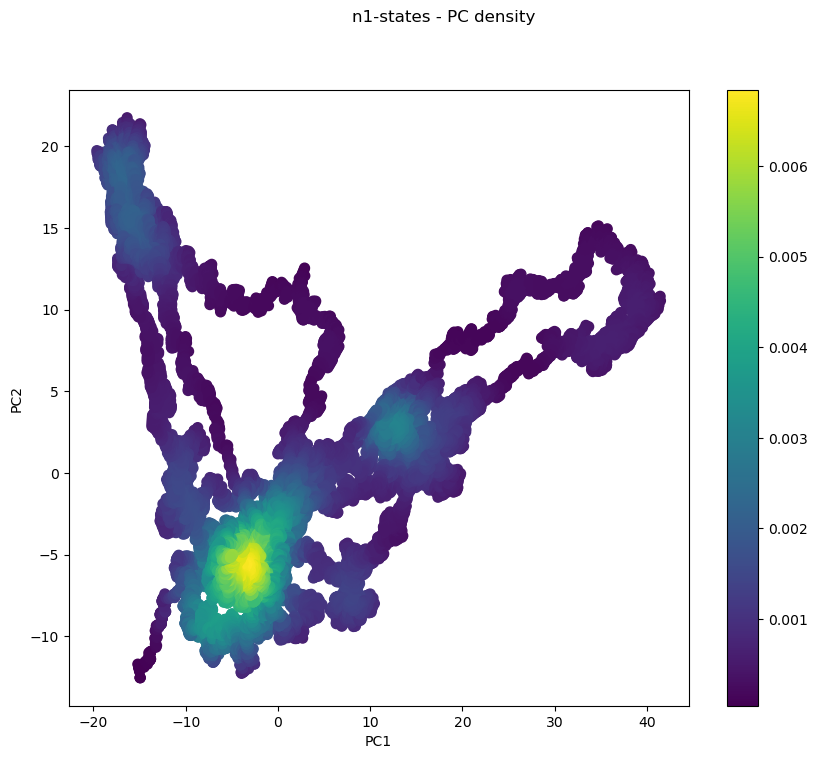

In [17]:
sm_n1_small.state_density()

[states.py:159 - INFO] Dimensionality reduction with Principal Component Analysis
[states.py:164 - INFO] Elapsed time: 0.1731569766998291 s
[states.py:165 - INFO] Explained Variance (first 3 components): [0.50115037 0.22076298 0.09463865]


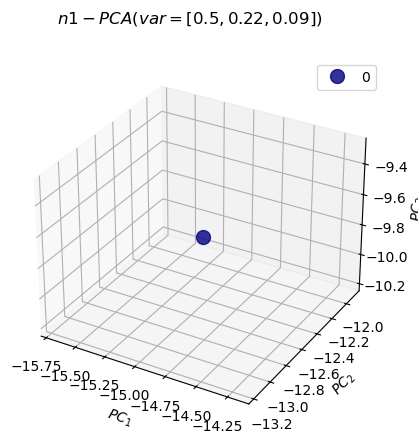

[states.py:181 - INFO] Dimensionality reduction with Factor Analysis
[states.py:187 - INFO] Elapsed time: 0.740103006362915 s / Score (NLL): -101.53370152144481


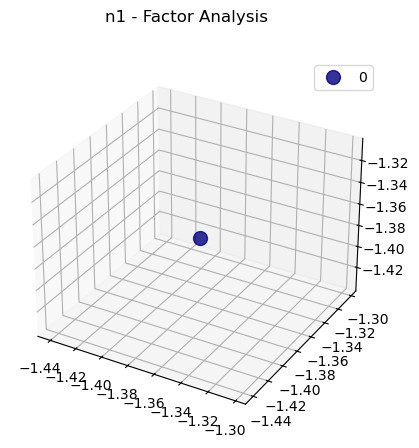

[states.py:199 - INFO] Dimensionality reduction with Locally Linear Embedding
[states.py:213 - INFO] 	standard - 33.191298961639404 s / Reconstruction error = 4.625751163895007e-12
[states.py:213 - INFO] 	ltsa - 990.1474142074585 s / Reconstruction error = 0.0022977196977055324


KeyboardInterrupt: 

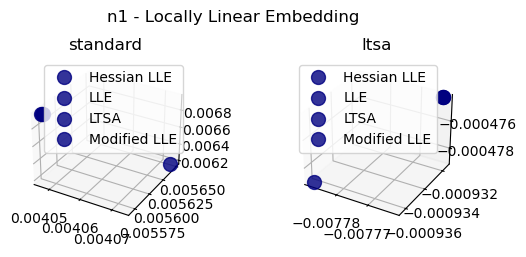

In [19]:
from conic_tools.analysis.metrics.states import dimensionality_reduction

dimensionality_reduction(sm_n1_small.matrix, data_label='n1', labels=[0], metric=None, standardize=True, plot=True, colormap='jet', display=True, save=False)